In [1]:
%matplotlib inline

import sys
import math

import geopandas as gpd

sys.path.insert(0, "../")
from weavingspace.tile_unit import TileUnit
from weavingspace.tile_map import Tiling
from weavingspace import tiling_utils
import shapely.geometry as geom
from shapely import line_interpolate_point
import geopandas as gpd

n_sides=6 n_slices=3 offset=0.6666666666666666


<Axes: >

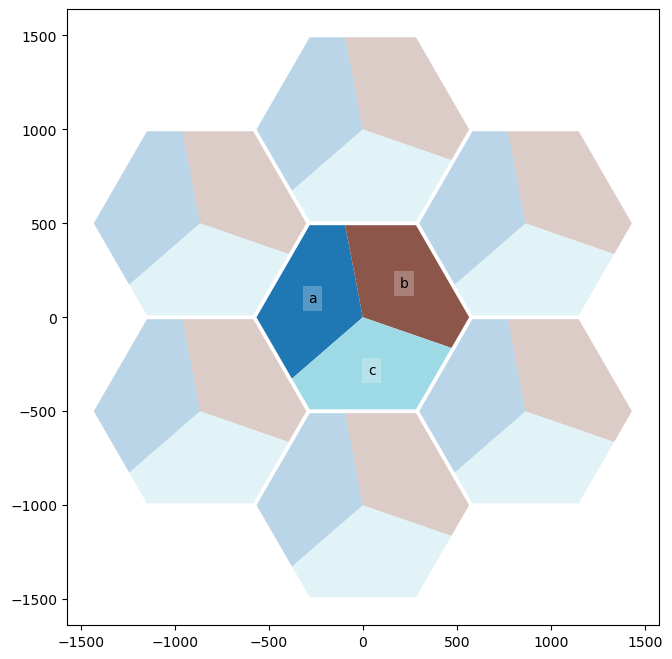

In [9]:
t = TileUnit(tiling_type = "hex-slice", n = 3, offset = 2/3).inset_prototile(10)
t.plot(r = 1, show_prototile = False, show_reg_prototile = False, cmap='tab20')

In [ ]:
1 / 2

In [ ]:
n_sides = 6
shape = tiling_utils.get_regular_polygon(1000, n_sides)
boundary = geom.LineString(shape.exterior.coords)

n_slices = 3
offset = 0.33
offset = offset % 1
along = [n_sides * _ / n_slices + offset for _ in range(n_slices)]
along = along + [n_sides + along[0]]
points = [line_interpolate_point(boundary, (a % n_sides) / n_sides, normalized = True) for a in along]
corners = [line_interpolate_point(boundary, i / n_sides, normalized = True) for i in range(n_sides + 1)]
print(f'{along}')

In [ ]:
slices = []
for a1, a2, p1, p2 in zip(along[:-1], along[1:], points[:-1], points[1:]):
  if math.floor(a1) == math.floor(a2):
     slices.append(geom.Polygon([p1, p2, (0, 0)]))
  else:
     print(f'{a1=}, {a2=}')
     missed_corners = corners[math.ceil(a1):math.ceil(a2)]
     slices.append(geom.Polygon([p1] + missed_corners + [p2, (0, 0)]))

ax = gpd.GeoSeries([shape]).plot()
gpd.GeoSeries(slices).plot(ax = ax, fc = 'grey', ec = 'w')

In [ ]:
ak = gpd.read_file("data/imd-auckland-2018.gpkg")

# Scratch pad
A barebones notebook for testing basic operations of the package. The above code loads necessary libraries and allows for making a map.

In [ ]:
tile = TileUnit(tiling_type="square-colouring", 
                code="3.3.4.3.4", 
                spacing=500, 
                n=5, 
                crs=ak.crs) \
                  .inset_prototile(20).inset_tiles(0) \
                  .transform_rotate(math.atan2(2,1)*180/math.pi + 45).transform_skew(0, 0).transform_scale(0.8, 1.25)
tile.plot(r=1)


In [ ]:
n = tile.tiles.shape[0]
vars = dict(zip(list("abcdefghijkl")[:n], [x for x in ak.columns if "Rank" in x][:n]))
cmaps = dict(zip(vars.values(), ["Reds", "Oranges", "Greens", "Blues", 
                                 "Purples", "Greys", "YlOrBr", "PuRd", 
                                 "YlOrRd", "BuGn", "BuPu", "YlGnBu" ][:n]))
tiling = Tiling(tile, ak)
map = tiling.get_tiled_map()
fig = map.render(variables=vars, colourmaps=cmaps, use_ellipse=True).set_facecolor("grey")